In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
train_dataset = torchvision.datasets.CIFAR10('./data',
                                     train=True,
                                     transform = transform,
                                     download=True)
test_dataset = torchvision.datasets.CIFAR10('./data',
                                    train=False,
                                    transform=transform)

Files already downloaded and verified


In [4]:
batch_size=32
train_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)

In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

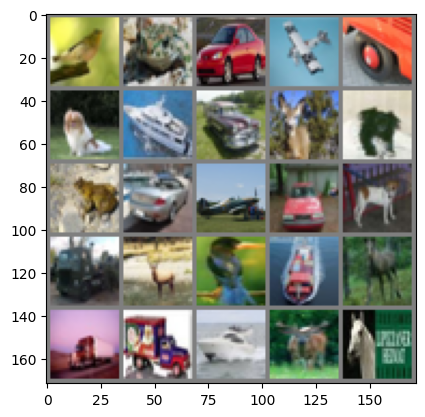

In [6]:
def imshow_imgs(imgs):
    imgs = imgs / 2 + .5
    npimgs = imgs.numpy()
    plt.imshow(np.transpose(npimgs, (1, 2, 0)))
    plt.show()
img_iter = iter(test_loader)
images, labels=next(img_iter)
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow_imgs(img_grid)

In [7]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64*4*4, 64)
        self.fc2 = nn.Linear(64, 10)
    # def forward(self, x):
    #     x = self.conv1(x)
    #     x = F.relu(x)
    #     x = self.pool(x)
    #     x = self.conv2(x)
    #     x = F.relu(x)
    #     x = self.conv3(x)
    #     x = F.relu(x)
    #     x = torch.flatten(x,1)
    #     x = self.fc1(x)
    #     x = F.relu(x)
    #     x = self.fc2(x)
    #     return x
    
    def forward(self, x):
        # N, 3, 32, 32
        x = F.relu(self.conv1(x))   # -> N, 32, 30, 30
        x = self.pool(x)            # -> N, 32, 15, 15
        x = F.relu(self.conv2(x))   # -> N, 64, 13, 13
        x = self.pool(x)            # -> N, 64, 6, 6
        x = F.relu(self.conv3(x))   # -> N, 64, 4, 4
        x = torch.flatten(x, 1)     # -> N, 1024
        x = F.relu(self.fc1(x))     # -> N, 64
        x = self.fc2(x)             # -> N, 10
        return x

model = ConvNet()

In [8]:
criterean = nn.CrossEntropyLoss()
learning_rate = 0.001
optim = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [9]:
num_epochs = 100
n_total = len(train_loader)
for epoch in range(num_epochs):
    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterean(outputs, labels)
        
        loss.backward()
        optim.step()
        optim.zero_grad()
        
        running_loss += loss.item()
    print(f'[{epoch + 1}] loss: {running_loss / n_total:.3f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

[1] loss: 1.498
[2] loss: 1.127
[3] loss: 0.949
[4] loss: 0.839
[5] loss: 0.767
[6] loss: 0.707
[7] loss: 0.657
[8] loss: 0.613
[9] loss: 0.572
[10] loss: 0.541
[11] loss: 0.506
[12] loss: 0.473
[13] loss: 0.439
[14] loss: 0.414
[15] loss: 0.387
[16] loss: 0.363
[17] loss: 0.343
[18] loss: 0.322
[19] loss: 0.307
[20] loss: 0.284
[21] loss: 0.273
[22] loss: 0.253
[23] loss: 0.244
[24] loss: 0.231
[25] loss: 0.216
[26] loss: 0.213
[27] loss: 0.199
[28] loss: 0.191
[29] loss: 0.187
[30] loss: 0.174
[31] loss: 0.172
[32] loss: 0.168
[33] loss: 0.167
[34] loss: 0.149
[35] loss: 0.149
[36] loss: 0.147
[37] loss: 0.144
[38] loss: 0.137
[39] loss: 0.141
[40] loss: 0.128
[41] loss: 0.129
[42] loss: 0.128
[43] loss: 0.131
[44] loss: 0.133
[45] loss: 0.114
[46] loss: 0.114
[47] loss: 0.117
[48] loss: 0.120
[49] loss: 0.118
[50] loss: 0.102
[51] loss: 0.114
[52] loss: 0.110
[53] loss: 0.110
[54] loss: 0.102
[55] loss: 0.108
[56] loss: 0.105
[57] loss: 0.107
[58] loss: 0.096
[59] loss: 0.107
[60] l

In [15]:
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

In [16]:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH)) # it takes the loaded dictionary, not the path file itself
loaded_model.eval()

with torch.no_grad():
    n_correct2 = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        # max returns (value ,index)
        outputs2 = loaded_model(images)
        _, predicted2 = torch.max(outputs2, 1)
        n_correct2 += (predicted2 == labels).sum().item()

    acc = 100.0 * n_correct2 / n_samples
    print(f'Accuracy of the loaded model: {acc} %')

Accuracy of the loaded model: 68.13 %
